# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de búsqueda de hiperparámetros para un modelo de Máquina de Soporte Vectorial (SVM).

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **22 de noviembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [14]:
#Para Collab.
#df = pd.read_csv('waterPotability/water_potability.csv').dropna()
main_path = "C:/Users/SEBASTIAN/OneDrive - Universidad de los Andes/OctavoSemestre/Machine Learning/Trabajos/ML_hw5/waterPotability/water_potability.csv"
df = pd.read_csv(main_path)
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

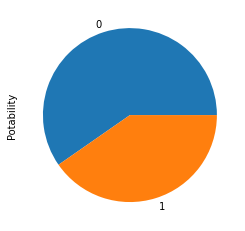

In [15]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [16]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

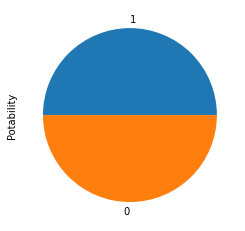

In [17]:
df['Potability'].value_counts().plot(kind='pie')

In [18]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [19]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Separación en Conjuntos de Validación/Prueba

Separe los datos (`X` y `y`) en conjuntos de:

- Entrenamiento (70%)
- Validación (15%)
- Prueba (15%)

Utilizando `train_test_split`.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=3)

In [21]:
print(len(x_train),len(x_val),len(x_test))

1680 360 360


## Parte 1: Evaluación de Modelos y GridSearch

Como recordará, en la tarea anterior se realizó un proceso de GridSearch y RandomizedSearch. En esta ocasión, nuevamente implementará este procedimiento para encontrar los mejores hiperparámetros.

Esta vez, se le solicita **desarrollar cada uno de los casos de forma manual y sin utilizar la librería SciKit-Learn (utilice ciclos `for`), obtener los mejores parámetros para los datos de VALIDACIÓN y graficar el histórico para los rangos del parámetro de regularización.**

- Kernel: Lineal, Polinomial (utilizar grados 1, 2, 3 y 4), Función Base Radial (RBF), Sigmoide.
- Parámetro de Regularización: Recorrido en escala logarítmica desde $10^{-3}$ hasta $10^{5}$.

Utilice la función `SVC` de `sklearn.svm` para definir y ajustar cada modelo.

In [22]:
para_regul = np.linspace(1E-3,1E5,num = 10)
print(para_regul)

[1.0000000e-03 1.1111112e+04 2.2222223e+04 3.3333334e+04 4.4444445e+04
 5.5555556e+04 6.6666667e+04 7.7777778e+04 8.8888889e+04 1.0000000e+05]


### Búsqueda de Hiperparámetros con GridSearch

#### Caso 1: Kernel Lineal

In [28]:
max_score = 0
score = np.array([])
best_model = 0
for i in para_regul:
    svc_linear = SVC(kernel='linear',C=i)
    svc_linear.fit(x_train,y_train)
    pred = svc_linear.predict(x_test)
    sco = accuracy_score(y_test,pred)
    score = np.append(score,sco)
    if sco > max_score:
        max_score = sco
        best_model = svc_linear

In [ ]:
print(f'the best score is {score.max}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score)]}')

the score [0.48611111 0.51944444 0.52222222 0.53888889 0.53611111 0.53333333
 0.53611111 0.53055556 0.52777778 0.53333333]


AttributeError: coef_ is only available when using a linear kernel

#### Caso 2: Kernel Polinomial

In [ ]:
max_score = 0
score = np.zeros((4,10))
best_model = 0
deg = [i for i in range(1,4,1)]
for id,i in enumerate(para_regul):
    for idx,j in enumerate(deg):
        svc_poly = SVC(kernel='poly',C=i,degree=j)
        svc_poly.fit(x_train,y_train)
        pred = svc_poly.predict(x_test)
        sco = accuracy_score(y_test,pred)
        score[idx,id] = sco
        if sco > max_score:
            max_score = sco
            best_model = svc_poly

In [ ]:
print(f'the best score is {score.max}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score)]}')

#### Caso 3: Función Base Radial

In [ ]:
max_score = 0
score = np.array([])
best_model = 0
for i in para_regul:
    svc_rbf = SVC(kernel='rbf',C=i)
    svc_rbf.fit(x_train,y_train)
    pred = svc_rbf.predict(x_test)
    sco = accuracy_score(y_test,pred)
    score = np.append(score,sco)
    if sco > max_score:
        print(sco,i)
        max_score = sco
        best_model = svc_rbf

In [ ]:
print(f'the best score is {score.max}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score)]}')

#### Caso 4: Kernel Sigmoide

In [ ]:
max_score = 0
score = np.array([])
best_model = 0
for i in para_regul:
    svc_sigm = SVC(kernel='sigmoid',C=i)
    svc_sigm.fit(x_train,y_train)
    pred = svc_sigm.predict(x_test)
    sco = accuracy_score(y_test,pred)
    score = np.append(score,sco)
    if sco > max_score:
        max_score = sco
        best_model = svc_sigm

In [ ]:
print(f'the best score is {score.max}')
print(f'The best model is with the C equal to {para_regul[np.argmax(score)]}')

## Parte 2: Análisis de Resultados

Ahora, basado en los resultados anteriores, obtenga una evaluación final del mejor modelo y concluya sobre la pertinencia del mismo dentro del contexto de este problema.

In [ ]:
from sklearn.metrics import accuracy_score

best_classifier = SVC(C= # #, kernel=# #, degree=# En caso de utilizar un Kernel polinomial #) # Parámetros del clasificador #
best_classifier.fit(x_train, y_train)    

y_pred = best_classifier.predict(x_val)

# Evaluación
print(f"Best classifier: {accuracy_score(y_test,y_pred)}")
print(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_rf)}")

## Conclusiones